In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()

In [3]:
YEAR = 2023
RACE = 'bahrain'
SESSION = 'R'

In [4]:
ff1.Cache.enable_cache('../../cache')

In [5]:
session = ff1.get_session(YEAR, RACE, SESSION)
weekend = session.event
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [6]:
HAM = session.laps.pick_driver('HAM')
RUS = session.laps.pick_driver('RUS')

VER = session.laps.pick_driver('VER')
PER = session.laps.pick_driver('PER')

LEC = session.laps.pick_driver('LEC')
SAI = session.laps.pick_driver('SAI')

NOR = session.laps.pick_driver('NOR')
PIA = session.laps.pick_driver('PIA')

OCO = session.laps.pick_driver('OCO')
GAS = session.laps.pick_driver('GAS')

TSU = session.laps.pick_driver('TSU')
DEV = session.laps.pick_driver('DEV')

ALO = session.laps.pick_driver('ALO')
STR = session.laps.pick_driver('STR')

BOT = session.laps.pick_driver('BOT')
ZHO = session.laps.pick_driver('ZHO')

ALB = session.laps.pick_driver('ALB')
SAR = session.laps.pick_driver('SAR')

MAG = session.laps.pick_driver('MAG')
HUL = session.laps.pick_driver('HUL')

In [7]:
df = pd.concat([HAM,RUS,VER,PER,LEC,SAI,NOR,
PIA,OCO,GAS,TSU,DEV,ALO,STR,BOT,ZHO,ALB,SAR,MAG,HUL])

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
#convert LapTime in timedelta64 to float in seconds
df['LapTime_seconds'] = df['LapTime'].dt.seconds*1000000 + df['LapTime'].dt.microseconds
df['LapTime_seconds'] = df['LapTime_seconds']/1000000

In [10]:
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTime_seconds
0,0 days 01:04:19.211000,44,NaT,1,1,0 days 00:25:24.318000,NaT,NaT,0 days 00:00:43.494000,0 days 00:00:24.338000,...,SOFT,4.0,False,0 days 01:02:36.652000,Mercedes,HAM,2,False,2023-03-05 15:03:38.501,NaN
1,0 days 01:05:58.377000,44,0 days 00:01:39.166000,2,1,NaT,NaT,0 days 00:00:31.408000,0 days 00:00:43.352000,0 days 00:00:24.406000,...,SOFT,5.0,False,0 days 01:04:19.211000,Mercedes,HAM,2,True,2023-03-05 15:05:21.060,99.166
2,0 days 01:07:37.597000,44,0 days 00:01:39.220000,3,1,NaT,NaT,0 days 00:00:31.298000,0 days 00:00:43.499000,0 days 00:00:24.423000,...,SOFT,6.0,False,0 days 01:05:58.377000,Mercedes,HAM,1,True,2023-03-05 15:07:00.226,99.220
3,0 days 01:09:16.795000,44,0 days 00:01:39.198000,4,1,NaT,NaT,0 days 00:00:31.315000,0 days 00:00:43.446000,0 days 00:00:24.437000,...,SOFT,7.0,False,0 days 01:07:37.597000,Mercedes,HAM,1,True,2023-03-05 15:08:39.446,99.198
4,0 days 01:10:56.130000,44,0 days 00:01:39.335000,5,1,NaT,NaT,0 days 00:00:31.350000,0 days 00:00:43.508000,0 days 00:00:24.477000,...,SOFT,8.0,False,0 days 01:09:16.795000,Mercedes,HAM,1,True,2023-03-05 15:10:18.644,99.335


In [26]:
df1[df1['Driver'] == 'RUS'][:-1]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTime_seconds
57,0 days 01:04:19.559000,63,NaT,1,1,0 days 00:25:49.958000,NaT,NaT,0 days 00:00:43.377000,0 days 00:00:24.168000,...,SOFT,4.0,False,0 days 01:02:36.652000,Mercedes,RUS,2,False,2023-03-05 15:03:38.501,NaN
58,0 days 01:05:59.149000,63,0 days 00:01:39.590000,2,1,NaT,NaT,0 days 00:00:31.709000,0 days 00:00:43.468000,0 days 00:00:24.413000,...,SOFT,5.0,False,0 days 01:04:19.559000,Mercedes,RUS,2,True,2023-03-05 15:05:21.408,99.590
59,0 days 01:07:38.242000,63,0 days 00:01:39.093000,3,1,NaT,NaT,0 days 00:00:31.218000,0 days 00:00:43.416000,0 days 00:00:24.459000,...,SOFT,6.0,False,0 days 01:05:59.149000,Mercedes,RUS,1,True,2023-03-05 15:07:00.998,99.093
60,0 days 01:09:17.503000,63,0 days 00:01:39.261000,4,1,NaT,NaT,0 days 00:00:31.267000,0 days 00:00:43.497000,0 days 00:00:24.497000,...,SOFT,7.0,False,0 days 01:07:38.242000,Mercedes,RUS,1,True,2023-03-05 15:08:40.091,99.261
61,0 days 01:10:57.052000,63,0 days 00:01:39.549000,5,1,NaT,NaT,0 days 00:00:31.367000,0 days 00:00:43.763000,0 days 00:00:24.419000,...,SOFT,8.0,False,0 days 01:09:17.503000,Mercedes,RUS,1,True,2023-03-05 15:10:19.352,99.549
62,0 days 01:12:36.545000,63,0 days 00:01:39.493000,6,1,NaT,NaT,0 days 00:00:31.196000,0 days 00:00:43.619000,0 days 00:00:24.678000,...,SOFT,9.0,False,0 days 01:10:57.052000,Mercedes,RUS,1,True,2023-03-05 15:11:58.901,99.493
63,0 days 01:14:16.601000,63,0 days 00:01:40.056000,7,1,NaT,NaT,0 days 00:00:31.589000,0 days 00:00:43.827000,0 days 00:00:24.640000,...,SOFT,10.0,False,0 days 01:12:36.545000,Mercedes,RUS,1,True,2023-03-05 15:13:38.394,100.056
64,0 days 01:15:56.911000,63,0 days 00:01:40.310000,8,1,NaT,NaT,0 days 00:00:31.522000,0 days 00:00:44.119000,0 days 00:00:24.669000,...,SOFT,11.0,False,0 days 01:14:16.601000,Mercedes,RUS,1,True,2023-03-05 15:15:18.450,100.310
65,0 days 01:17:37.331000,63,0 days 00:01:40.420000,9,1,NaT,NaT,0 days 00:00:31.652000,0 days 00:00:44.022000,0 days 00:00:24.746000,...,SOFT,12.0,False,0 days 01:15:56.911000,Mercedes,RUS,1,True,2023-03-05 15:16:58.760,100.420
66,0 days 01:19:17.863000,63,0 days 00:01:40.532000,10,1,NaT,NaT,0 days 00:00:31.699000,0 days 00:00:44.074000,0 days 00:00:24.759000,...,SOFT,13.0,False,0 days 01:17:37.331000,Mercedes,RUS,1,True,2023-03-05 15:18:39.180,100.532


In [106]:
# Ganti Stint number sesuai kebutuhan
stint = 1
df_stint = df[(df['Stint'] == stint)]

# Ganti driver sesuai kebutuhan
driver1 = 'ALO'
driver2 = 'VER'
driver3 = 'LEC'
driver4 = 'GAS'

df_1 = df_stint[df_stint['Driver'] == driver1][1:-1]
df_2 = df_stint[df_stint['Driver'] == driver2][1:-1]
df_3 = df_stint[df_stint['Driver'] == driver3][1:-1]
df_4 = df_stint[df_stint['Driver'] == driver4][1:-1]

df_concat = pd.concat([df_1, df_2, df_3, df_4])
df_concat = df_concat.reset_index(drop=True)

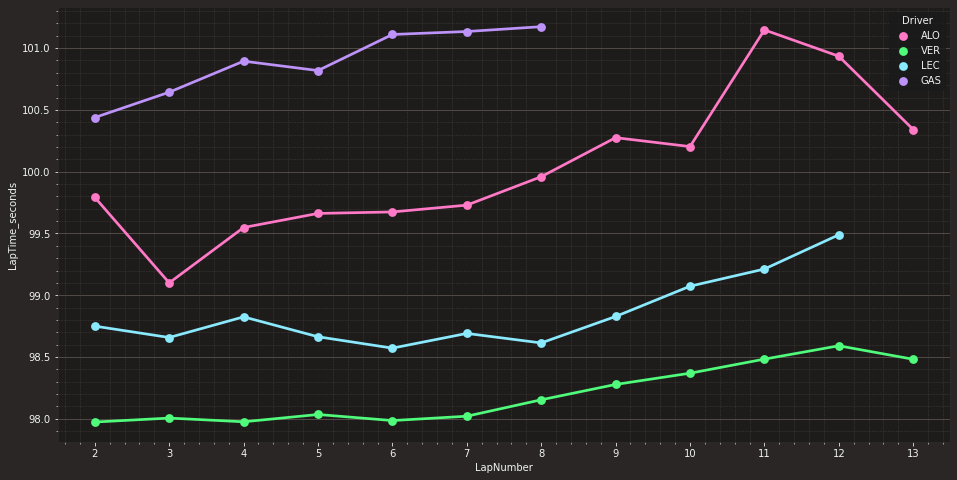

In [108]:
fig = plt.subplots(figsize=(16, 8))
#sns.set_style("ticks",{'axes.grid' : False})
plot = sns.pointplot(
    data=df_concat, x="LapNumber", y="LapTime_seconds",
    hue='Driver'
)

In [116]:
df_concat.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTime_seconds
0,0 days 01:06:00.344000,14,0 days 00:01:39.792000,2,1,NaT,NaT,0 days 00:00:31.743000,0 days 00:00:43.626000,0 days 00:00:24.423000,...,SOFT,5.0,False,0 days 01:04:20.552000,Aston Martin,ALO,2,True,2023-03-05 15:05:22.401,99.792
1,0 days 01:07:39.444000,14,0 days 00:01:39.100000,3,1,NaT,NaT,0 days 00:00:31.541000,0 days 00:00:43.276000,0 days 00:00:24.283000,...,SOFT,6.0,False,0 days 01:06:00.344000,Aston Martin,ALO,1,True,2023-03-05 15:07:02.193,99.100
2,0 days 01:09:18.992000,14,0 days 00:01:39.548000,4,1,NaT,NaT,0 days 00:00:31.723000,0 days 00:00:43.457000,0 days 00:00:24.368000,...,SOFT,7.0,False,0 days 01:07:39.444000,Aston Martin,ALO,1,True,2023-03-05 15:08:41.293,99.548
3,0 days 01:10:58.654000,14,0 days 00:01:39.662000,5,1,NaT,NaT,0 days 00:00:31.705000,0 days 00:00:43.553000,0 days 00:00:24.404000,...,SOFT,8.0,False,0 days 01:09:18.992000,Aston Martin,ALO,1,True,2023-03-05 15:10:20.841,99.662
4,0 days 01:12:38.328000,14,0 days 00:01:39.674000,6,1,NaT,NaT,0 days 00:00:31.695000,0 days 00:00:43.482000,0 days 00:00:24.497000,...,SOFT,9.0,False,0 days 01:10:58.654000,Aston Martin,ALO,1,True,2023-03-05 15:12:00.503,99.674


In [154]:
df_reg = pd.DataFrame()
df_reg['LapNumber'] = df_concat['LapNumber'].astype(float)
df_reg['LapTime_seconds'] = df_concat['LapTime_seconds']
df_reg['Driver'] = df_concat['Driver']

In [161]:
df_reg.head()

,LapNumber,LapTime_seconds,Driver
0,2.0,99.792,ALO
1,3.0,99.100,ALO
2,4.0,99.548,ALO
3,5.0,99.662,ALO
4,6.0,99.674,ALO


In [155]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LapNumber        42 non-null     float64
 1   LapTime_seconds  42 non-null     float64
 2   Driver           42 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [175]:
df_reg['Driver'].unique()

array(['ALO', 'VER', 'LEC', 'GAS'], dtype=object)

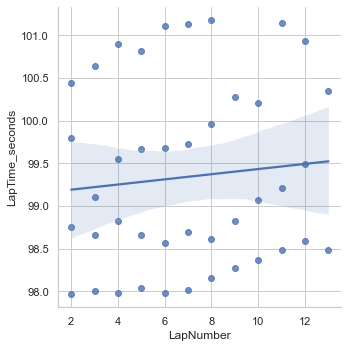

In [185]:
sns.lmplot(data=df_reg, x='LapNumber', y='LapTime_seconds')#, hue='Driver')

In [186]:
asd = df_reg[(df_reg['Driver'] == 'ALO') | (df_reg['Driver'] == 'VER')]

In [188]:
asd

,LapNumber,LapTime_seconds,Driver
0,2.0,99.792,ALO
1,3.0,99.100,ALO
2,4.0,99.548,ALO
3,5.0,99.662,ALO
4,6.0,99.674,ALO
5,7.0,99.729,ALO
6,8.0,99.959,ALO
7,9.0,100.275,ALO
8,10.0,100.203,ALO
9,11.0,101.147,ALO


KeyError: 0

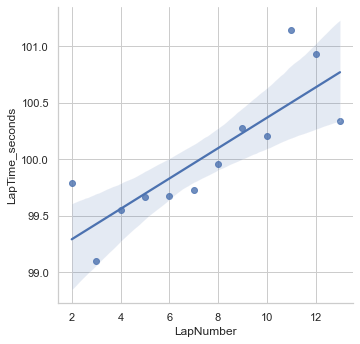

In [192]:
sns.lmplot(data=asd, x='LapNumber', y='LapTime_seconds', hue='Driver')